In [48]:
##Mostly for dataframe operations
import pandas as pd

##Mostly for REGEX
import re

In [2]:
import nltk
##download some of the feature to local desktop
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
##Functions and attributes within the package "NLTK"
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [5]:
##import stpwords from the NLTK library
##(The NLTK corpus is a massive dump of all kinds of natural language data sets that are definitely worth taking a look at)
from nltk.corpus import stopwords

##specify to extract only stopwords in english - only top 10 words
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
##Start = 0; End = 500; increment = 25
stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

## A. Read - semi structured data

#### Data - text messages labelled as spam or ham

In [13]:
##read in the text data
rawData = open("SMSSpamCollection.tsv").read()

##print the raw data - only 500 characters
## /t--> seperate labels 
## /n --> seperates individual lines
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [14]:
##split datas and add to list
parsedData = rawData.replace('\t','\n').split('\n')
parsedData[0:10]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

In [19]:
##create a seperate list with texts/ labels alone
labelList = parsedData[0::2]
textList = parsedData[1::2]

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though"]
5571


In [20]:
print(labelList[0:5])
print(textList[0:3])
print(len(labelList))
print(len(textList))

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though"]
5571
5570


In [21]:
##Since there is mismatch in the array length, lets check the last few elements of array causing the mishap
##- stratfrom last and 5 pick five from last
labelList[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [22]:
##All except last row
labelList = labelList[:-1]
print(len(labelList))

5570


In [23]:
##Now that we have read the text file, we will add them to dataframe with header using pandas

fullCorpus = pd.DataFrame({
    'label':labelList,
    'body_list':textList
})

In [25]:
fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### Read the text file using pandas easily 

In [94]:
##sep = seerator will tell how to split columns and if header none then would consider firs row as default header
fullCorpus = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
##To specify columns
fullCorpus.columns=['label', 'body_text']
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## B. Explore the data

In [95]:
##Understand the data

##A. Number of rows and columns
print("Input data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

##B. How many spam and ham are there
print("Input data has {} spam and {} ham".format(len(fullCorpus[fullCorpus['label']=='spam']),len(fullCorpus[fullCorpus['label']=='ham'])))

##C. How many missing data
print("Num of missing values in labels = {} & body_text = {}".format(fullCorpus['label'].isnull().sum(), fullCorpus['label'].isnull().sum()))

Input data has 5568 rows and 2 columns
Input data has 746 spam and 4822 ham
Num of missing values in labels = 0 & body_text = 0


#### i. Regex - SPLIT

In [96]:
re_test = 'This is made up string to test 2 different regex methods'
re_test_messy = 'This    is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different-regex-methods'

In [97]:
##Split to list of words
##SPLIT based on SINGLE white space 
print(re.split('\s', re_test))

##SPLIT based on ONE OR MORE white spaces
print(re.split('\s+', re_test_messy))

##SPLIT based on ONE OR MORE NON_WORD Character
##w--> word and W--> non-word
print(re.split('\W+', re_test_messy1))

['This', 'is', 'made', 'up', 'string', 'to', 'test', '2', 'different', 'regex', 'methods']
['This', 'is', 'a', 'made', 'up', 'string', 'to', 'test', '2', 'different', 'regex', 'methods']
['This', 'is', 'a', 'made', 'up', 'string', 'to', 'test', '2', 'different', 'regex', 'methods']


#### ii. Regex - FINDALL

In [99]:
##Instead of Split we can use find all words alone
re.findall('\w+', re_test_messy1)

##Findall using non space
re.findall('\S+', re_test)

['This',
 'is',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [100]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [101]:
## important REGEX is case sensitive (strings of 1 or more character)
##[A-Z0-9]-->search for letters or numbers
##[A-Z]+[0-9]+--> search for letters and number occuring together
print(re.findall('[A-Z]+[0-9]+', pep8_test))
print(re.findall('[A-Z]+[0-9]+', pep7_test))
print(re.findall('[A-Z]+[0-9]+', peep8_test))

['PEP8']
['PEP7']
['PEEP8']


#### iii. Regex - SUB

In [102]:
##substitute ---> PATTERN + REPLACE WITH + REPLACE WHAT
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

#### iii. OTHER important methods
re.search()
re.match()
re.fullmatch()
re.finditer()
re.escape()

## C. Cleaning Data- preprocessing

-> remove punctuation
-> Tokenization
-> Remove stopwords
-> Lemmatize/stem

In [103]:
pd.set_option('display.max_colwidth',100)
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### i. REMOVE PUNCTUATION

In [104]:
## Punctuation are considered as a seperate token so we can have it removed
import string

string.punctuation

##List comprehension - char by char but we need words so join based on empty string
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

fullCorpus['body_text_clean']= fullCorpus['body_text'].apply(lambda x: remove_punct(x))

In [105]:
fullCorpus.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


#### ii. TOKENIZATION

In [106]:
##tokenize the text - split sentence to list of words
##Important to consider changing all to either lower or upper case
##Split based on non words

def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens

fullCorpus['body_text_tokenized'] = fullCorpus['body_text_clean'].apply(lambda x: tokenize(x.lower()))
fullCorpus.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


#### iii. STOPWORDS

In [107]:
stopwords = nltk.corpus.stopwords.words('english')

##Function to remove stopwords
def remove_stopwords(text):
    tokenzied_text = [word for word in text if word not in stopwords]
    return tokenzied_text

fullCorpus['body_text_nostop'] = fullCorpus['body_text_tokenized'].apply(lambda x: remove_stopwords(x))


In [108]:
fullCorpus.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### iv. STEMMING 

reduce the inflated words to their word stem or root 

-> PORTER STEMMER
-> Snowball stemmer
-> Regex Based Stemmer
-> Lancaster Stemmer

In [109]:
ps = nltk.PorterStemmer() 

In [110]:
##check methods included as part of porter stemmer
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [111]:
data = fullCorpus[['label','body_text','body_text_nostop']]
data.head()

,label,body_text,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


In [112]:
def stemming(text):
     stemmed_text = [ps.stem(word) for word in text]
     return stemmed_text

data['stemmed_text'] = data['body_text_nostop'].apply(lambda x: stemming(x))
data.head()

C:\Users\baran\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,label,body_text,body_text_nostop,stemmed_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"


#### V. LEMMATIZING 

-->takes crude approach- just trims the suffix but faster when compared to lemmatizing
-->root words , more dictionary words

-->WORDNET LEMMATIZER

In [113]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [115]:
def lemmatize_text(text):
    lemmatized_text = [wn.lemmatize(word) for word in text]
    return lemmatized_text

data['lemmatized_text'] = data['body_text_nostop'].apply(lambda x: lemmatize_text(x))
data.head()

,label,body_text,body_text_nostop,stemmed_text,lemmatized_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]","[date, sunday]"


## D. Vectorizing
 
 encode text as integers to create feature vectors(n-dimensional vector of numerical feature of some object)
 
 --> count vectorization(how many times a word occur)
 --> N-grams
 --> TF-IDF

#### I. Count Vectorization

finally, show them in Vectorizers output sparse matrices

sparse matrices --> A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of non-zero elements

In [126]:
pd.set_option('display.max_colwidth',100)
data1 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data1.columns= ['label', 'body_text']
data1.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [127]:
def data_clean(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = re.split('\W+', text)
    text = [ps.stem(word) for word in text if word not in stopwords]
    return text

In [128]:
####call count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

##instantiate and define
##There are lot of hyper parameters to countvectorizer but we are going to use analyzer for passing our method
## if we dont set other hyperparameter then it takes in default value
count_vect = CountVectorizer(analyzer= data_clean)

##Take the countvector object created and fit it to the data needed
##If only FIT - train the vectoriser object to learn what words are there in corpus
#####  X_counts = count_vect.fit(data1['body_text'])

##So fit & transform -- fit the vectorizer and change the data to feature vectors
X_counts = count_vect.fit_transform(data1['body_text'])
##how many text message and how many unique words
print(X_counts.shape)
##print all unique words across the corpus
print(count_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [133]:
###Consider sample data to view the vectorized data easily
data_sample = data1[0:20]

count_vector = CountVectorizer(analyzer = data_clean)
X_counts_sample = count_vector.fit_transform(data_sample['body_text'])
print(X_counts_sample.shape)
print(count_vector.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

In [135]:
##Sparse matrix
X_counts_sample

<20x201 sparse matrix of type '<class 'numpy.int64'>'
	with 228 stored elements in Compressed Sparse Row format>

In [136]:
##Inorder to expand out the matrix we call the array
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [138]:
###Get the unique words to be the column names using get_feature_names from count vectorized object
X_counts_df.columns = count_vector.get_feature_names()
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


#### II. N-grams

document-term matrix -> counts still occupy the cell but instea dof columns representing single terms, they represent all combinations of adjacent word of length

n=2 -> bigram
n=3 -> trigram
n=4 -> four-gram

Imp: --> it requires text in string as opposed to tokenized format

In [139]:
pd.set_option('display.max_colwidth',100)
data2 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data2.columns= ['label', 'body_text']
data2.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [140]:
def data_clean(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in text if word not in stopwords])
    return text

data2['cleaned_text'] = data2['body_text'].apply(lambda x: data_clean(x))
data2.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [146]:
from sklearn.feature_extraction.text import CountVectorizer

##initialize the vector - we say the ngram search to involve only unigram(1,1)--- unigram & bigram(1,2)
##range of ngrams we are searching for
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(data2['cleaned_text'])

print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5568, 31275)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

In [149]:
###visualize the vector for less data
data2_sample = data2[0:20]

sample_vect = CountVectorizer(ngram_range=(2,2))
sample_vect_count = sample_vect.fit_transform(data2_sample['cleaned_text'])
print(sample_vect_count.shape)
print(sample_vect.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

In [152]:
ngramMatrix = pd.DataFrame(sample_vect_count.toarray())
ngramMatrix.columns = sample_vect.get_feature_names()
ngramMatrix

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### III. TF-IDF

as opposed to count, the value in each cell is based on weights

In [153]:
pd.set_option('display.max_colwidth',100)
data3 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data3.columns= ['label', 'body_text']
data3.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [154]:
def data_clean(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = re.split('\W+', text)
    text = [ps.stem(word) for word in text if word not in stopwords]
    return text


In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = data_clean)
tfidf_count = tfidf_vect.fit_transform(data['body_text'])

print(tfidf_count.shape)
print(tfidf_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [162]:
###To better understand lets work it out with sample
sample_data3 = data3[0:20]

sample3_vect = TfidfVectorizer(analyzer= data_clean)
sample3_count = sample3_vect.fit_transform(sample_data3['body_text'])

print(sample3_count.shape)
print(sample3_vect.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

In [163]:
tfidfMatrix = pd.DataFrame(sample3_count.toarray())
tfidfMatrix.columns = sample3_vect.get_feature_names()
tfidfMatrix

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## E. Feature Engineering

creating new features or transform existing feature to get most out of the data

1. Create new Feature:
     --> length of text field (spam has longer length)
     --> % of punctuation 
     --> % of words capitalized
     
2. Transform existing data
     ---> Power transformation like (square root, squaring data)
     ---> transform if the data is more skewed, pull the outliers to match the mean and reduce the skewness
     ---> Standardizing - transform all variable to fit in same scale
     

### a. Feature Creation

In [164]:
pd.set_option('display.max_colwidth',100)
data4 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data4.columns= ['label', 'body_text']
data4.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### I. New Length field excluding white spaces 

In [165]:
data4['body_len'] = data4['body_text'].apply(lambda x: len(x)-x.count(" "))
data4.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


#### II. New % of punctuation

In [172]:
import string 

def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round((count/(len(text)- text.count(" "))),3)*100

In [174]:
data4['punct%'] = data4['body_text'].apply(lambda x: count_punctuation(x))
data4.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### c. Feature Evaluation

In [176]:
###use overlayed histograms
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\baran\Anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\baran\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


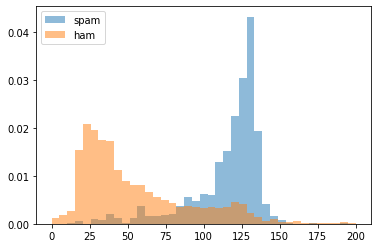

In [178]:
##min length =0; max length=200 and gaps be 40
bins = np.linspace(0,200,40)

##aplha - to add darkness; normed - if you want to normalize data; bins- how many histo bars we would like to have
pyplot.hist(data4[data4['label']=='spam']['body_len'], bins, alpha=0.5, normed= True, label='spam')
pyplot.hist(data4[data4['label']=='ham']['body_len'], bins, alpha=0.5, normed= True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

C:\Users\baran\Anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\baran\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


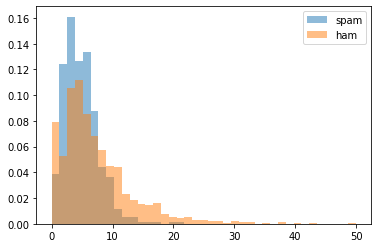

In [180]:
##min length =0; max length=200 and gaps be 40
bins = np.linspace(0,50,40)

##aplha - to add darkness; normed - if you want to normalize data; bins- how many histo bars we would like to have
pyplot.hist(data4[data4['label']=='spam']['punct%'], bins, alpha=0.5, normed= True, label='spam')
pyplot.hist(data4[data4['label']=='ham']['punct%'], bins, alpha=0.5, normed= True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

### b. Feature Transformation

In [182]:
###use overlayed histograms
from matplotlib import pyplot
import numpy as np
%matplotlib inline

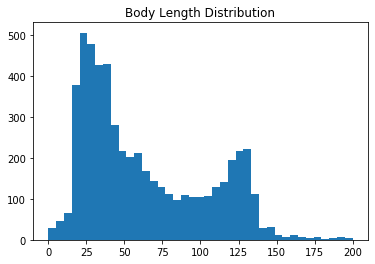

In [184]:
bins = np.linspace(0,200,40)

### spam are long and ham are concentrated below
pyplot.hist(data4['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

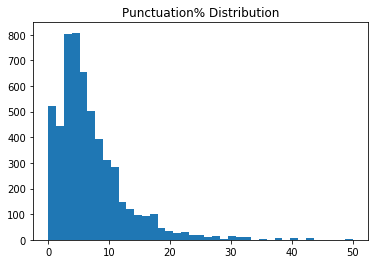

In [185]:
###### Punct% looks more right skewed
bins = np.linspace(0,50,40)

### spam are long and ham are concentrated below
pyplot.hist(data4['punct%'], bins)
pyplot.title("Punctuation% Distribution")
pyplot.show()

transform the skewness 

How?????

pull the tail to make compact distribution- so model doesnot get distracted trying to chase down outliers in that tail

***BOX COX POWER TRANSFORMATION***

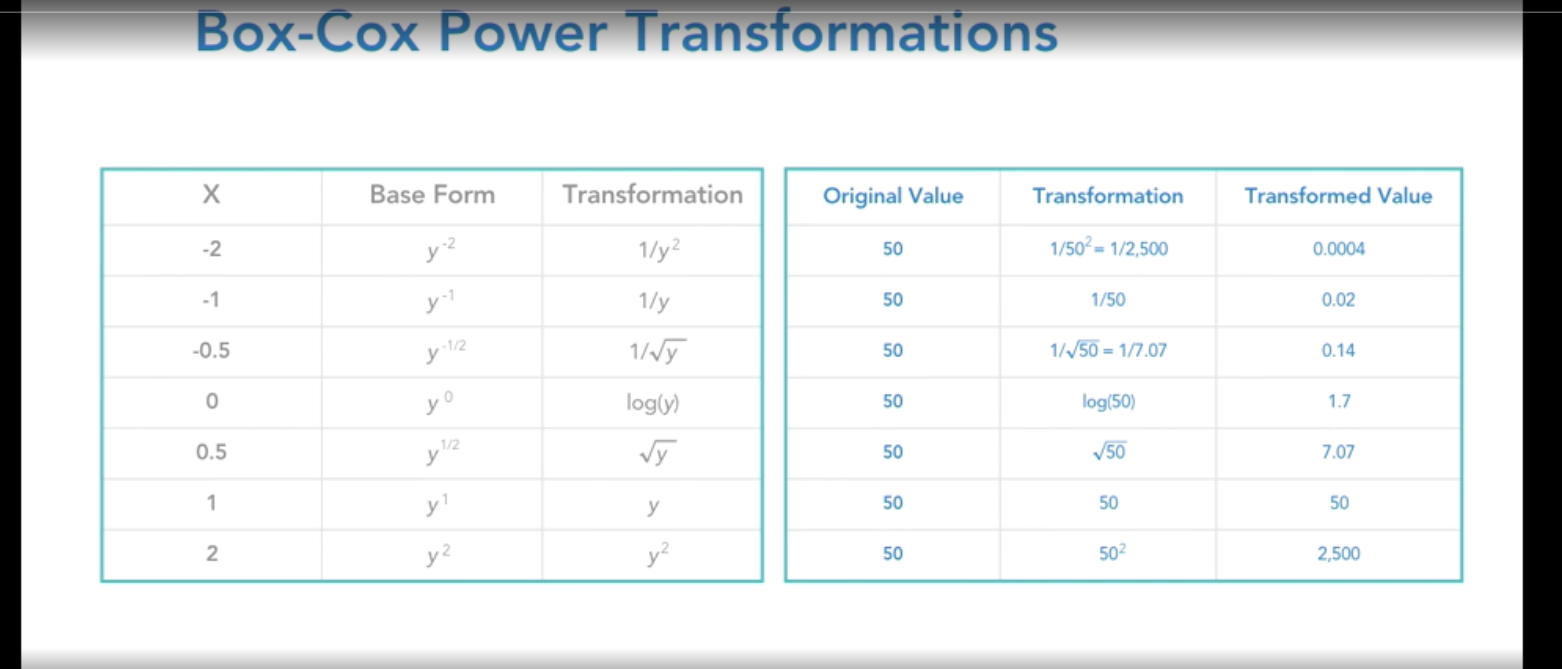

***Steps in transformation process***

1. what range of exponents to test

2. Apply each transformation

3. some criteria to determine which yields best distribution

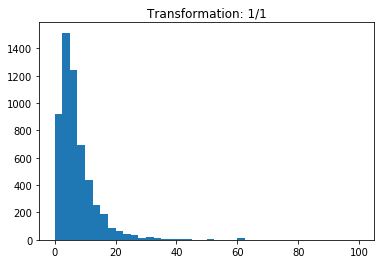

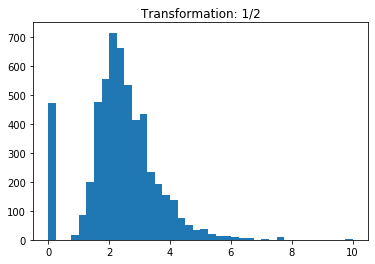

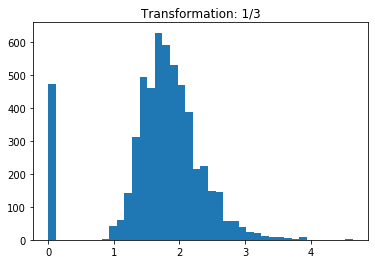

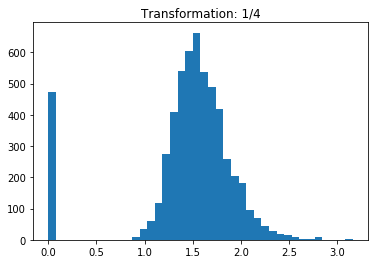

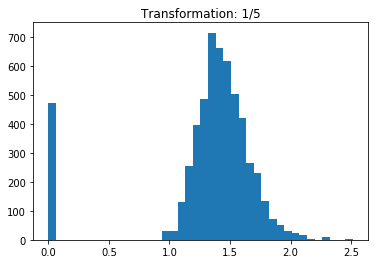

In [189]:
##TRy exponential transformation of Punt% to correct the skewness and make the outliers pull more and more towards the centre
### use the symbol "**" for exponential calculation

for i in [1,2,3,4,5]:
    pyplot.hist((data4['punct%'])**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()
    

## F. Machine Learning

1. Holdout test set
--> test set - sample dataset set aside and not used in fitting any model to test its ability on unseen data

2. K-fold Cross Validation
--> this is used to evaluate the model,full dataset is K-subsets and holdout method is repeated K times
so one of K-subsets is used for testing and rest K-1 are put together to be used to train the model.

3. Evaluate Model
-->	Precision - all things that were said relevant   (FP really costly then optimize the model for Precision)

--> Recall - all things that were actually relevant (FN really costly then optimize the model for recall)

#### i. Random Forest 
Ensemble Learning --> constructs collection of decision tree and then aggregates the predictions of each tree to determine final prediction

    
**Method used : Bagging** 
Samples randomly / parallelize / train quickly / unweighted voting / Easier to tune, harder to overfit

Benefit :
1. useful for classification/regression type problems
2. easily handles outliers, missing values, etc.
3. Accepts various types of input (continuous, ordinal,etc)
4. Less likely to overfit
5. Feature important score for each feature

In [199]:
pd.set_option('display.max_colwidth',100)
data5 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data5.columns= ['label', 'body_text']
data5.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [200]:
##create a sepearte feature for count-len and count% of punctuation

##Field for length of text
data5['body_len'] = data['body_text'].apply(lambda x: len(x)- x.count(" "))

##Field for % of punctuation

def count_punct(text):
    countVal = sum([1 for char in text if char in string.punctuation])
    return round(((countVal)/(len(text)- text.count(" "))),3)*100

data5['punct%'] = data['body_text'].apply(lambda x:count_punct(x))
data5.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [201]:
import string
import re
import nltk
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

##method to handle cleaning of data

def clean_text(text):
    text = " ".join([word.lower() for word in text if word not in string.punctuation])
    text = re.split('\W+', text)
    text = [ps.stem(word) for word in text if word not in stopwords]
    return text

In [202]:
##perform vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(data5['body_text'])

X_features = pd.concat([data5['body_len'], data5['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,160,2.5,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.157083,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.407846,0.404499,0.377804,0.0,0.08308,0.257814,0.0,...,0.071954,0.14608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.092022,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.472263,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
from sklearn.ensemble import RandomForestClassifier

##Default setting for these
print(dir(RandomForestClassifier))
##Find hyperparameter - nestimator --> number of decision tree(default = 10)
##maxdepth --> how deep will each decision tree will be
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0

In [205]:
###RUN RandomForest through K fold 
from sklearn.model_selection import KFold, cross_val_score

##n_jobs =-1, for process run in parallel
rf = RandomForestClassifier(n_jobs=-1)

##assign each ibservation to 5 subset 
k_fold = KFold(n_splits=5)

##Model ---- the input feature ---- Label----which observation belong to which subset-----which scoring method
cross_val_score(rf, X_features, data5['label'], cv= k_fold, scoring ='accuracy', n_jobs=-1)

array([0.97666068, 0.98025135, 0.97755835, 0.96765499, 0.97214735])

***Random ForestClassifier through holdout set ***

FIRST ---> FIT ****** need X and Y ***** Will need Train data

THEN ----> PREDICT ****** need only X ***** Will need Test data

In [209]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [210]:
##Split the data into test and train dataset
##speify x as feature and Y as the lebel field 
X_train, X_test, Y_train, Y_test = train_test_split(X_features, data5['label'], test_size=0.2)

In [211]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit (X_train,Y_train)

In [213]:
###Random forest gives feature importance(List of features without name)----so add column to understand better
##Default sort --asc, reverse helps in desc
sorted(zip(rf_model.feature_importances_,X_train.columns), reverse = True)[0:10]

[(0.24684027658702326, 1),
 (0.09973308098274498, 9),
 (0.08681782428107793, 8),
 (0.08508206780551272, 2),
 (0.0701458552019037, 6),
 (0.045823239243870446, 4),
 (0.045207359130697754, 7),
 (0.03530560712236082, 'body_len'),
 (0.030015173989323712, 5),
 (0.02714614741909659, 10)]

In [216]:
y_pred = rf_model.predict(X_test)
##positive label --> if it is not binary(0,1) then we need to tell the positive label 
##so in our case we want them to predict spam
precision, recall, fscore , support = score(Y_test, y_pred, pos_label='spam', average='binary')

In [218]:
###take rows where y_pred == y_test and take count of it


###Precision ---> All mails in spam folder is actually spam

####Recall -----> All mail that has come into ***your email*** was properly placed in spam folder

####Accuracy ---> All mail that has come into ***your email*** is spam or ham

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision,3),
                                                         round(recall,3),
                                                         round((y_pred==Y_test).sum() / len(y_pred),3)))

Precision: 0.986 / Recall: 0.88 / Accuracy: 0.981


***Random ForestClassifier Grid search to find the best hyper parameter to get better accuracy ***

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, data5['label'], test_size=0.2)

In [220]:
##NUMBER OF estimator and depth
## --> n_jobs =-1 fr parallel processing

## Run randomforestclassifier for multiple estimator and max depth --- and fit the best model with train data
##------- predict using the test data
def train_RF(n_est,depth):
    rf = RandomForestClassifier(n_estimators=n_est,max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print ('Est: {}/ Depth: {}/ ---- Precision: {} / Recall: {}/ Accuracy:{}'.format(
    n_est, depth, round(precision,3), round(recall,3), round(((y_pred==y_test).sum()/len(y_pred)),3) ))

In [221]:
##Depth increase- model become aggresive
for n_est in [10,50,100]:
    for depth in [10,20,30]:
        train_RF(n_est,depth)
        

Est: 10/ Depth: 10/ ---- Precision: 0.979 / Recall: 0.91/ Accuracy:0.985
Est: 10/ Depth: 20/ ---- Precision: 0.986 / Recall: 0.897/ Accuracy:0.984
Est: 10/ Depth: 30/ ---- Precision: 0.972 / Recall: 0.89/ Accuracy:0.981
Est: 50/ Depth: 10/ ---- Precision: 0.979 / Recall: 0.91/ Accuracy:0.985
Est: 50/ Depth: 20/ ---- Precision: 0.979 / Recall: 0.897/ Accuracy:0.983
Est: 50/ Depth: 30/ ---- Precision: 0.979 / Recall: 0.91/ Accuracy:0.985
Est: 100/ Depth: 10/ ---- Precision: 0.979 / Recall: 0.91/ Accuracy:0.985
Est: 100/ Depth: 20/ ---- Precision: 0.979 / Recall: 0.903/ Accuracy:0.984
Est: 100/ Depth: 30/ ---- Precision: 0.979 / Recall: 0.897/ Accuracy:0.983


**Grid Search** - Exhaustively search all parameter combinations ina given grid to determine best model

**Cross-Validation** - Divide dataset into K subsets and repeat the holdout method K times

***Tuning and Evaluate Random ForestClassifier***

Select exact set of parameter and within each setting run cross validation on each

In [222]:
pd.set_option('display.max_colwidth',100)
data6 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data6.columns= ['label', 'body_text']
data6.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [223]:
##create a sepearte feature for count-len and count% of punctuation

##Field for length of text
data6['body_len'] = data6['body_text'].apply(lambda x: len(x)- x.count(" "))

##Field for % of punctuation

def count_punct(text):
    countVal = sum([1 for char in text if char in string.punctuation])
    return round(((countVal)/(len(text)- text.count(" "))),3)*100

data6['punct%'] = data6['body_text'].apply(lambda x:count_punct(x))
data6.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [224]:
import string
import re
import nltk
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

##method to handle cleaning of data

def clean_text(text):
    text = " ".join([word.lower() for word in text if word not in string.punctuation])
    text = re.split('\W+', text)
    text = [ps.stem(word) for word in text if word not in stopwords]
    return text

In [226]:
##TF-IDF 

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data6['body_text'])
X_tfidf_feat = pd.concat([data6['body_len'], data6['punct%'], pd.DataFrame(X_tfidf.toarray())], axis =1)

##Count Vectorizer 
count_vect = CountVectorizer(analyzer= clean_text)
X_count = count_vect.fit_transform(data6['body_text'])
X_count_feat = pd.concat([data6['body_len'],data6['punct%'], pd.DataFrame(X_count.toarray())],axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,160,2.5,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,128,4.7,0,5,5,5,0,1,3,0,...,2,2,0,0,0,0,0,0,0,0
2,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,3.2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,28,7.1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [229]:
###GridSearch CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [232]:
##Which Classifier and how many estimator and depth of each tree be specified before doing gridsearch
rf = RandomForestClassifier()
param ={'n_estimators' : [10,150,300], 
        'max_depth' : [30,60,90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs= -1)

##feed in training data X and Y to fit in gs
gs_fit = gs.fit(X_tfidf_feat, data6['label'])

##Results across all the parameter; across all the folds
##Top 5 models
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,3.870416,0.023142,0.102018,0.005804,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.978475,0.982047,0.978437,0.977538,0.979335,0.979167,0.001548,1
4,3.966056,0.056720,0.112397,0.002963,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.980269,0.982047,0.979335,0.976640,0.977538,0.979167,0.001927,1
11,7.219697,0.183681,0.168749,0.023988,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977578,0.982944,0.979335,0.977538,0.978437,0.979167,0.002001,1
8,7.592685,0.081195,0.209118,0.009301,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977578,0.981149,0.979335,0.977538,0.979335,0.978987,0.001342,4
10,3.766543,0.101333,0.104019,0.008084,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978475,0.982047,0.978437,0.976640,0.979335,0.978987,0.001764,4


In [233]:
##Which Classifier and how many estimator and depth of each tree be specified before doing gridsearch
rf = RandomForestClassifier()
param ={'n_estimators' : [10,150,300], 
        'max_depth' : [30,60,90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs= -1)

##feed in training data X and Y to fit in gs
gs_fit = gs.fit(X_count_feat, data6['label'])

##Results across all the parameter; across all the folds
##Top 5 models
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,2.311942,0.112853,0.111848,0.022014,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.979372,0.986535,0.978437,0.974843,0.980234,0.979885,0.003798,1
11,4.238796,0.100485,0.174133,0.011206,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978475,0.987433,0.976640,0.977538,0.979335,0.979885,0.003881,1
10,2.195928,0.036517,0.107315,0.008099,None,150,"{'max_depth': None, 'n_estimators': 150}",0.979372,0.987433,0.974843,0.976640,0.979335,0.979526,0.004309,3
5,4.792155,0.075713,0.215649,0.014900,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.979372,0.984740,0.976640,0.974843,0.979335,0.978987,0.003348,4
2,4.510001,0.102205,0.206986,0.008247,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.978475,0.985637,0.975741,0.974843,0.979335,0.978807,0.003799,5


***12 param combination (3*4)***
1. mean_fit_time --> average time to fit
2. mean_score_time ---> avg time for each model to make prediction
3. mean_test_Score ----> avg accuracy on test set
3. mean_test_Score ----> avg accuracy on test set

#### ii. Gradient Boosting
Ensemble Learning --> iterative approach to combining WEAK LEARNERS to create STRONG LEARNERS by focusing on mistakes of prior iterations
They use decision tree as well, but use gradient stump--> increase weightage on imporatnt feature and reduce error

**Method used : Boosting** 
    Samples with increased weights / iterative / can be parallelized but takes lot of time / weighted voting
    Harder to tune,easier to fit


Benefit :
1. Powerful
2. Various type of input
3. Used for classification/regression
4. Output feature importance

Cons:
1. Longer to train
2. More likely to overfit
3. More difficult to properly tune


In [235]:
pd.set_option('display.max_colwidth',100)
data7 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data7.columns= ['label', 'body_text']
data7.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [236]:
##create a sepearte feature for count-len and count% of punctuation

##Field for length of text
data7['body_len'] = data7['body_text'].apply(lambda x: len(x)- x.count(" "))

##Field for % of punctuation

def count_punct(text):
    countVal = sum([1 for char in text if char in string.punctuation])
    return round(((countVal)/(len(text)- text.count(" "))),3)*100

data7['punct%'] = data7['body_text'].apply(lambda x:count_punct(x))
data7.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [237]:
import string
import re
import nltk
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

##method to handle cleaning of data

def clean_text(text):
    text = " ".join([word.lower() for word in text if word not in string.punctuation])
    text = re.split('\W+', text)
    text = [ps.stem(word) for word in text if word not in stopwords]
    return text

In [238]:
##TF-IDF 

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data7['body_text'])
X_tfidf_feat = pd.concat([data7['body_len'], data7['punct%'], pd.DataFrame(X_tfidf.toarray())], axis =1)
X_tfidf_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,160,2.5,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.157083,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.407846,0.404499,0.377804,0.0,0.08308,0.257814,0.0,...,0.071954,0.14608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.092022,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.472263,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
from sklearn.ensemble import GradientBoostingClassifier

##Default setting for these
print(dir(GradientBoostingClassifier))
##Find hyperparameter - nestimator --> number of decision tree(default = 10)
##maxdepth --> how deep will each decision tree will be
##Default --> 3 and estimator only 100
##basic tree
##n_jobs is missing because it trains from previous iteration rather run in parallel
##Learning Rate--> optimize model too quickly ; 
print(GradientBoostingClassifier())


['_SUPPORTED_LOSS', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_initialized', '_check_params', '_clear_state', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_raw_predict', '_raw_predict_init', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_estimator', '_validate_y', 'apply', 'decision_function', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params', 'staged_decision_function', 'staged_predict', 'staged_p

In [240]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_feat, data7['label'], test_size=0.2)

In [244]:
##LearningRate,
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators = est, max_depth= max_depth, learning_rate = lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average ='binary')
    print ('Est: {}/ Depth: {}/ LR: {} ---- Precision: {} / Recall: {}/ Accuracy:{}'.format(
    est, max_depth,lr, round(precision,3), round(recall,3), round(((y_pred==y_test).sum()/len(y_pred)),3) ))

In [245]:
###Warning --> one of the model didnt predict one text message to be spam -- so precision will be zero in this case

for n_est in [50,100, 150]:
    for max_depth in [3,7,11,15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth,lr)

C:\Users\baran\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50/ Depth: 3/ LR: 0.01 ---- Precision: 0.0 / Recall: 0.0/ Accuracy:0.865
Est: 50/ Depth: 3/ LR: 0.1 ---- Precision: 0.964 / Recall: 0.88/ Accuracy:0.979
Est: 50/ Depth: 3/ LR: 1 ---- Precision: 0.852 / Recall: 0.847/ Accuracy:0.96


C:\Users\baran\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50/ Depth: 7/ LR: 0.01 ---- Precision: 0.0 / Recall: 0.0/ Accuracy:0.865
Est: 50/ Depth: 7/ LR: 0.1 ---- Precision: 0.962 / Recall: 0.847/ Accuracy:0.975
Est: 50/ Depth: 7/ LR: 1 ---- Precision: 0.898 / Recall: 0.88/ Accuracy:0.97


C:\Users\baran\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50/ Depth: 11/ LR: 0.01 ---- Precision: 0.0 / Recall: 0.0/ Accuracy:0.865
Est: 50/ Depth: 11/ LR: 0.1 ---- Precision: 0.955 / Recall: 0.853/ Accuracy:0.975
Est: 50/ Depth: 11/ LR: 1 ---- Precision: 0.878 / Recall: 0.86/ Accuracy:0.965


C:\Users\baran\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50/ Depth: 15/ LR: 0.01 ---- Precision: 0.0 / Recall: 0.0/ Accuracy:0.865
Est: 50/ Depth: 15/ LR: 0.1 ---- Precision: 0.883 / Recall: 0.853/ Accuracy:0.965
Est: 50/ Depth: 15/ LR: 1 ---- Precision: 0.915 / Recall: 0.86/ Accuracy:0.97
Est: 100/ Depth: 3/ LR: 0.01 ---- Precision: 0.976 / Recall: 0.82/ Accuracy:0.973
Est: 100/ Depth: 3/ LR: 0.1 ---- Precision: 0.964 / Recall: 0.88/ Accuracy:0.979
Est: 100/ Depth: 3/ LR: 1 ---- Precision: 0.841 / Recall: 0.847/ Accuracy:0.958
Est: 100/ Depth: 7/ LR: 0.01 ---- Precision: 0.969 / Recall: 0.84/ Accuracy:0.975
Est: 100/ Depth: 7/ LR: 0.1 ---- Precision: 0.956 / Recall: 0.867/ Accuracy:0.977
Est: 100/ Depth: 7/ LR: 1 ---- Precision: 0.91 / Recall: 0.873/ Accuracy:0.971
Est: 100/ Depth: 11/ LR: 0.01 ---- Precision: 0.941 / Recall: 0.847/ Accuracy:0.972
Est: 100/ Depth: 11/ LR: 0.1 ---- Precision: 0.955 / Recall: 0.853/ Accuracy:0.975
Est: 100/ Depth: 11/ LR: 1 ---- Precision: 0.892 / Recall: 0.88/ Accuracy:0.969
Est: 100/ Depth: 15/ LR: 0.0

**Grid Search** - Exhaustively search all parameter combinations ina given grid to determine best model

**Cross-Validation** - Divide dataset into K subsets and repeat the holdout method K times

***Tuning and Evaluate Gradient Boosting Classifier***

Select exact set of parameter and within each setting run cross validation on each

In [247]:
##LOAD THE DATA
pd.set_option('display.max_colwidth',100)
data8 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data8.columns= ['label', 'body_text']

##---------------------------------------------------------------------------------------------##

##CLEAN THE DATA
import string
import re
import nltk
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

##method to handle cleaning of data

def clean_text(text):
    text = " ".join([word.lower() for word in text if word not in string.punctuation])
    text = re.split('\W+', text)
    text = [ps.stem(word) for word in text if word not in stopwords]
    return text

##------------------------------------------------------------------------------------------##

##ADD NEW FEATURES
##create a sepearte feature for count-len and count% of punctuation

##Field for length of text
data8['body_len'] = data8['body_text'].apply(lambda x: len(x)- x.count(" "))

##Field for % of punctuation

def count_punct(text):
    countVal = sum([1 for char in text if char in string.punctuation])
    return round(((countVal)/(len(text)- text.count(" "))),3)*100

data8['punct%'] = data8['body_text'].apply(lambda x:count_punct(x))
data8.head()

##-------------------------------------------------------------------------------------------##



,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [248]:
##VECTORIZE
##TF-IDF 

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data8['body_text'])
X_tfidf_feat = pd.concat([data8['body_len'], data8['punct%'], pd.DataFrame(X_tfidf.toarray())], axis =1)

##Count Vectorizer 
count_vect = CountVectorizer(analyzer= clean_text)
X_count = count_vect.fit_transform(data8['body_text'])
X_count_feat = pd.concat([data8['body_len'],data8['punct%'], pd.DataFrame(X_count.toarray())],axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,160,2.5,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,128,4.7,0,5,5,5,0,1,3,0,...,2,2,0,0,0,0,0,0,0,0
2,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,3.2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,28,7.1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [251]:
##GRIDSEARCH CV 
##-----CV on entire dataset rather just the holdout set

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
##-------------------------------------------------------------------------------------------##

##Using TFIDF

gb = GradientBoostingClassifier()
##Create Graient Boosting classifier and pass parameters
##---parameter grd will be dictionary (keys: hyperparameter and values will be list of setting)
param = {
    'n_estimators': [100,150],
    'max_depth': [7,11,15],
    'learning_rate': [0.1]
}

## n_jobs = -1 ;  that means that we'll train models on different subsets and parameter settings in parallel.
## It does not mean that each of the models themselves will be trained in parallel.cannot be done in parallel
##Cuz each iteration depends on previous

gs = GridSearchCV(gb, param, cv =5, n_jobs=-1)
cv_fit = gs.fit(X_tfidf_feat,data8['label'])
print(pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5])

##------------------------------------------------------------------------------------------------##

##Using Count vector

##Using TFIDF

gb = GradientBoostingClassifier()
##Create Graient Boosting classifier and pass parameters
##---parameter grd will be dictionary (keys: hyperparameter and values will be list of setting)
param = {
    'n_estimators': [100,150],
    'max_depth': [7,11,15],
    'learning_rate': [0.1]
}

## n_jobs = -1 ;  that means that we'll train models on different subsets and parameter settings in parallel.
## It does not mean that each of the models themselves will be trained in parallel.cannot be done in parallel
##Cuz each iteration depends on previous

gs = GridSearchCV(gb, param, cv =5, n_jobs=-1)
cv_fit = gs.fit(X_count_feat,data8['label'])
print(pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5])

##------------------------------------------------------------------------------------------------##


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.104991      0.119456         0.010901        0.002018   
1       5.882305      0.216579         0.012762        0.002772   
3       4.966974      0.315632         0.009189        0.000740   
2       5.233098      0.466154         0.009781        0.001739   
4       4.207304      0.429948         0.007995        0.001097   

  param_learning_rate param_max_depth param_n_estimators  \
0                 0.1               7                100   
1                 0.1               7                150   
3                 0.1              11                150   
2                 0.1              11                100   
4                 0.1              15                100   

                                                         params  \
0   {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}   
1   {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}   
3  {'learning_rate': 0.1, 'max_dept

## G. BEST ML MODEL

generally vectors are done for entire data, but here we gonna do vectors matrix only to words that are there on teh train set 

In [261]:
##LOAD THE DATA
pd.set_option('display.max_colwidth',100)
data8 = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data8.columns= ['label', 'body_text']

##---------------------------------------------------------------------------------------------##

##CLEAN THE DATA
import string
import re
import nltk
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

##method to handle cleaning of data

def clean_text(text):
    text = " ".join([word.lower() for word in text if word not in string.punctuation])
    text = re.split('\W+', text)
    text = [ps.stem(word) for word in text if word not in stopwords]
    return text

##------------------------------------------------------------------------------------------##

##ADD NEW FEATURES
##create a sepearte feature for count-len and count% of punctuation

##Field for length of text
data8['body_len'] = data8['body_text'].apply(lambda x: len(x)- x.count(" "))

##Field for % of punctuation

def count_punct(text):
    countVal = sum([1 for char in text if char in string.punctuation])
    return round(((countVal)/(len(text)- text.count(" "))),3)*100

data8['punct%'] = data8['body_text'].apply(lambda x:count_punct(x))
data8.head()

##-------------------------------------------------------------------------------------------##



,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [262]:
##Before vectorizing, we will need to split traina and test set and then proceed with vectorizing

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data8[['body_text','body_len','punct%']], data8['label'], test_size=0.2)

In [264]:
##VECTORIZE
##TF-IDF 

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
##Fit only on training dataset---used training set to fit our vectorizer object(this doesnot have vectorized columns)
##Fit_transform in previous steps cuz we did for whole data but here we fit only train data )
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

##Get the vectorized column using train and test data(so recognize words only from "test" dataset )
tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])


##convert sparse matrix to dataframe ---> using toarray()
##indices doesnot match so need to reset and drop old index
##axis=1 ---> side by side
##axis=0 --> stack one above the other
X_train_vect = pd.concat([X_train[['body_len','punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis =1)

X_test_vect = pd.concat([X_test[['body_len','punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis =1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,148,5.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,6.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,41.7,0.778103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54,3.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##See the above only has labels that are in training dataset; if any value in test doesnot match woth train it will not appear 
##and will reduce the accuracy

##FINAL EVALUATION OF MODEL

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [267]:
##------------------------------INITIALIZE A ML MODEL(RANDOMFORESTCLASSIFIER)-----------------------------##

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)


##--------------------------------FIT- TRAINING DATASET && PREDICT - TESTING DATASET----------------------------##
import time
start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end-start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end=time.time()
pred_time= (end-start)


##----------------------------------EVALUATE THE MODEL----------------------------------##

precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
print ('Fit_time: {}/ Pred_time: {}/ Precision: {} / Recall: {}/ Accuracy:{}'.format(
round(fit_time,3), round(pred_time,3), round(precision,3), round(recall,3), round(((y_pred==y_test).sum()/len(y_pred)),3) ))

Fit_time: 0.318/ Pred_time: 0.107/ Precision: 0.947 / Recall: 0.838/ Accuracy:0.972


In [269]:
##------------------------------INITIALIZE A ML MODEL(GRADIENTBOOSTINGCLASSIFIER)-----------------------------##

gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)


##--------------------------------FIT- TRAINING DATASET && PREDICT - TESTING DATASET----------------------------##

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end-start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end=time.time()
pred_time= (end-start)


##----------------------------------EVALUATE THE MODEL----------------------------------##

precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
print ('Fit_time: {}/ Pred_time: {}/ Precision: {} / Recall: {}/ Accuracy:{}'.format(
round(fit_time,3), round(pred_time,3), round(precision,3), round(recall,3), round(((y_pred==y_test).sum()/len(y_pred)),3) ))

Fit_time: 2.95/ Pred_time: 0.015/ Precision: 0.926 / Recall: 0.845/ Accuracy:0.97


##Predict time is more important than Fit_Time

##Precision and recall states how better our model performs

**FINAL EVALUATION**

1. Further evaluation

->slice test set

->examine textmessages the model is getting wrong

2. Result trade-off

--> bottle neck cases - choose lesser predict time

--> in case of spam filter-->optimize for precision(it is spam then spam --FP are costly) random forest
--> in case of antivirus --> optimize for recall ( it is able to capture breech-- FN are costly)